In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [10]:
#Load Data
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [14]:
# seprate the data we needed from the training/testing
X_train = df_train[['1stFlrSF','2ndFlrSF','LowQualFinSF','BedroomAbvGr','BsmtFullBath','BsmtHalfBath','FullBath', 'HalfBath']]
y_train = df_train['SalePrice']
X_test =df_test[['1stFlrSF','2ndFlrSF','LowQualFinSF','BedroomAbvGr','BsmtFullBath','BsmtHalfBath','FullBath', 'HalfBath']]
y_train.isnull().sum()

np.int64(0)

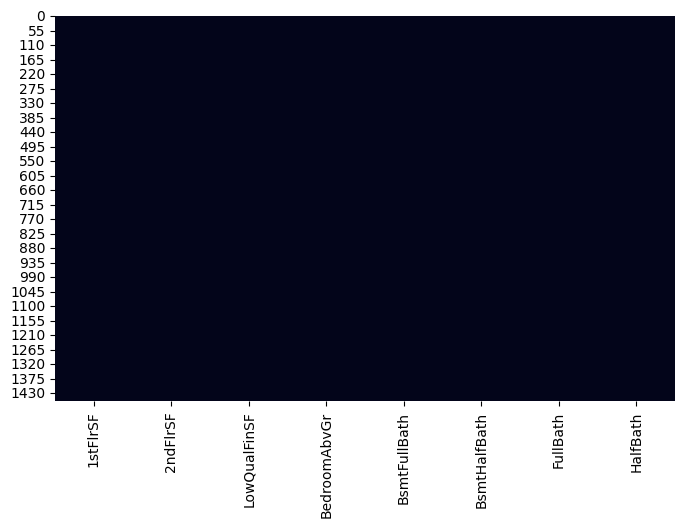

In [12]:
# check the null values in X_trian data by visualization
plt.figure(figsize=(8, 5))
sns.heatmap(X_train.isnull(), cbar=False)
plt.show()

In [17]:
#check the null values in y_train 
y_train.isnull().sum()

np.int64(0)

In [20]:
# Impute null values using .loc to  change the null values in orginal dataset
X_test.loc[:, 'BsmtFullBath'] = X_test['BsmtFullBath'].fillna(X_test['BsmtFullBath'].median())
X_test.loc[:, 'BsmtHalfBath'] = X_test['BsmtHalfBath'].fillna(X_test['BsmtHalfBath'].median())

# Check for remaining null values
X_test.isnull().sum()


1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
BedroomAbvGr    0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
dtype: int64

In [21]:
# create the model
model = LinearRegression()

In [22]:
# fit the model
model.fit(X_train, y_train)

LinearRegression()

In [23]:
#predict the model
y_prdict =model.predict(X_test)

In [29]:
# predict values
final_data = pd.DataFrame({'id': df_test['Id'], 'SalePrice': y_prdict})
final_data

,id,SalePrice
0,1461,103238.777097
1,1462,159999.631744
2,1463,192736.534126
3,1464,190900.523989
4,1465,184531.094194
...,...,...
1454,2915,100983.369024
1455,2916,100983.369024
1456,2917,126809.167052
1457,2918,104981.711789
